<a href="https://colab.research.google.com/github/radhikark0707/DisneyPlus-Hotstar-EDA/blob/main/disney_plus_shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
disney_hotstar=pd.read_csv('/content/disney_plus_shows.csv')

In [ ]:
disney_hotstar

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,tt3544734,Zapped,"When Zoey's mom remarries, Zoey finds it hard ...",movie,TV-G,2014,23 Jun 2014,"November 12, 2019",102 min,"Comedy, Family, Fantasy",Peter DeLuise,"Leslie Margolis (based on the novel ""Boys Are ...","Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",English,"Canada, USA",5 wins & 1 nomination.,NaN,5.1,"3,750"
988,tt0186726,Zenon: Girl of the 21st Century,An inquisitive teenager pries into suspected d...,movie,TV-G,1999,23 Jan 1999,"November 12, 2019",97 min,"Adventure, Comedy, Family, Sci-Fi",Kenneth Johnson,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Raven-Symoné, Stuart Pankin, H...",English,USA,2 nominations.,NaN,6.4,"6,378"
989,tt0271271,Zenon: The Zequel,A mischievous fifteen-year-old girl living on ...,movie,TV-G,2001,12 Jan 2001,"November 12, 2019",100 min,"Comedy, Family, Adventure, Sci-Fi",Manny Coto,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Shadia Simmons, Lauren Maltby,...",English,"USA, New Zealand",1 nomination.,NaN,5.9,"3,318"
990,tt0379060,Zenon: Z3,The heroine sets out to win an important compe...,movie,TV-G,2004,11 Jun 2004,"November 12, 2019",81 min,"Adventure, Comedy, Family, Sci-Fi",Steve Rash,"Marilyn Sadler (character from the book ""Zenon...","Kirsten Storms, Lauren Maltby, Alyson Morgan, ...",English,USA,NaN,NaN,5.5,"2,339"


In [ ]:
print('Basic information')
disney_hotstar.info()

Basic information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  874 non-null    object 
 7   added_at     992 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     856 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  metascore    292 non-null    float64
 17  imdb_rating  879 non-null    float64
 18  imdb_votes   879 non-null    obj

In [ ]:
print('\n Missing values')
disney_hotstar.isnull().sum()


 Missing values


,0
imdb_id,98
title,98
plot,126
type,98
rated,250
year,98
released_at,118
added_at,0
runtime,154
genre,107


In [ ]:
#drop rows missing essential columns and columns with excessive missing values
disney_hotstar.dropna(subset=['imdb_id','title','type','imdb_rating','year'],inplace=True)
disney_hotstar.drop(columns=['awards','metascore','writer','plot','rated','released_at'],inplace=True)

In [ ]:
disney_hotstar['runtime']=disney_hotstar['runtime'].str.replace('min','').astype(float)
median_runtime=disney_hotstar['runtime'].median()
disney_hotstar['runtime']=disney_hotstar['runtime'].fillna(median_runtime)

In [ ]:
#Handling missing value in categorical columns with most common values(mode)
for col in ['genre','language','country','director','actors']:
  disney_hotstar[col]=disney_hotstar[col].fillna(disney_hotstar[col].mode()[0])

In [ ]:
#clean up 'imdb_votes' by removing commas,converting to float and filling missing values
disney_hotstar['imdb_votes']=disney_hotstar['imdb_votes'].str.replace(',','').astype(float)
disney_hotstar['imdb_votes']=disney_hotstar['imdb_votes'].fillna(disney_hotstar['imdb_votes'].median())

In [ ]:
#display cleaned dataset info
print('\n Dataset after cleaning')
disney_hotstar.info()


 Dataset after cleaning
<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0 to 991
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      879 non-null    object 
 1   title        879 non-null    object 
 2   type         879 non-null    object 
 3   year         879 non-null    object 
 4   added_at     879 non-null    object 
 5   runtime      879 non-null    float64
 6   genre        879 non-null    object 
 7   director     879 non-null    object 
 8   actors       879 non-null    object 
 9   language     879 non-null    object 
 10  country      879 non-null    object 
 11  imdb_rating  879 non-null    float64
 12  imdb_votes   879 non-null    float64
dtypes: float64(3), object(10)
memory usage: 96.1+ KB


In [ ]:
disney_hotstar.isnull().sum()

,0
imdb_id,0
title,0
type,0
year,0
added_at,0
runtime,0
genre,0
director,0
actors,0
language,0


In [ ]:
#clean 'year' column by removing non-integer value
disney_hotstar['year']=disney_hotstar['year'].apply(lambda x:x if str(x).isdigit() else None)
disney_hotstar.dropna(subset=['year'],inplace=True)

In [ ]:
#convert 'year' to integer after cleaning
disney_hotstar['year']=disney_hotstar['year'].astype(int)

some values in year (like '2018-') are not integers so they cannot directly represent a specific year.cleaning ensures that only valid years (like 2018) remain making them data consistent

In [ ]:
#set a consistent color palette for plot
sns.set_palette('Set2')
sns.set(style='whitegrid')

In [ ]:
#define custom colour for each plot
colors={
    "hist":"skyblue",
    "runtime":"orange",
    "type":"seagreen",
    "genre":"plum",
    "year":"teal",
    "correlation":"coolwarm"
    }

In [ ]:
#plotting each EDA analysis with structured comments

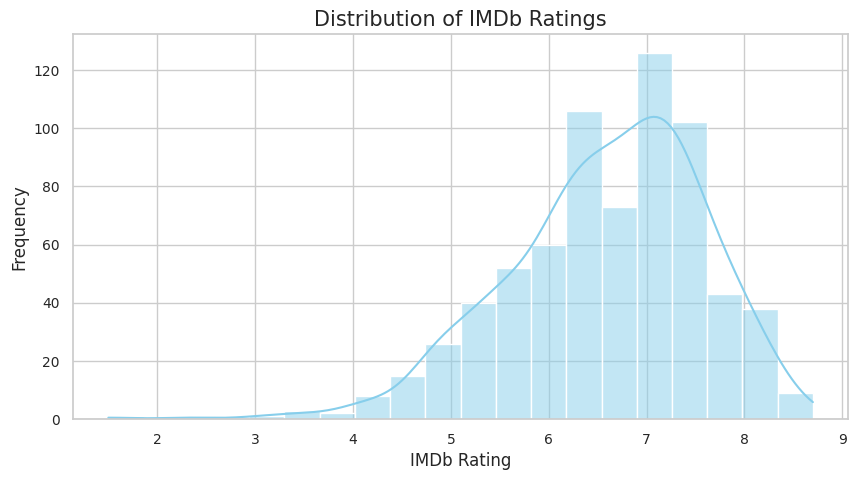

In [ ]:
# 1.IMDb Rating distribution
plt.figure(figsize=(10,5))
sns.histplot(disney_hotstar['imdb_rating'],bins=20,kde=True,color=colors['hist'])
plt.title('Distribution of IMDb Ratings',fontsize=15)
plt.xlabel('IMDb Rating',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


1.   **Rating concentration**:The ratings are most commonly concentrated between 5 and 8. This range suggest that most Disney+content has above-average to good ratings aligning with family-friendly and widely appealing content
2.   **Peak ratings**:The highest frequency occurs around the 6 to 7 rating range.This indicate that a significant portion of the Disney+ library falls into the average to good quality category based on IMDb ratings


3.   **Right skew**:There's a slight right skew as the distribution tails offas it moves towards higher ratings(8+).This shows fewer tiles with very high IMDb ratings,which could mean that while Disney+ content is generally well-received ,very few tiles are considered exceptional
4.   **Low rating count**:There are few ratings below 5,suggesting that Disney+tends to avoid poorly rated or less popular content,maintaining a certain quality standard in its library

These insight help illustrate Disney+ focus on maintaining a quality threshold for its content making it family friendly and appealing to broad audience





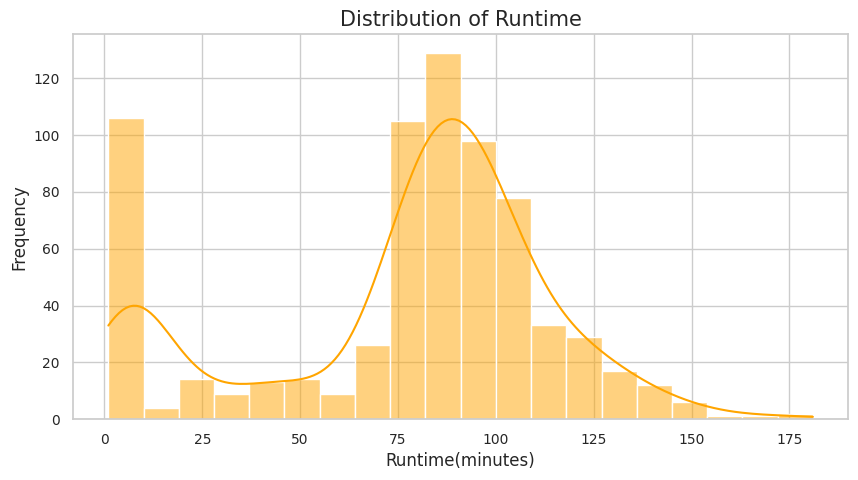

In [ ]:
# 2.Runtime Distribution
plt.figure(figsize=(10,5))
sns.histplot(disney_hotstar['runtime'],bins=20,kde=True,color=colors['runtime'])
plt.title('Distribution of Runtime',fontsize=15)
plt.xlabel('Runtime(minutes)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



1.   **Runtime cluster**:The distribution has 2 main clusters .One peak is near very short runtimes(less than 15 minutes)likely representing short films or episodes.Another prominent peak occurs around 80-100 minutes which correspond to the typical length of feature film
2.   **Feature film dominance**:The highest frequency is around the 80-100 minute mark. This suggest thatmost content on disney+ consist of feature length-films which align with the platform's extensive library of family oriented movies


3.   **Longer Runtime scarcity**:There are fewer entries with runtimes over 120 minutes indicating that Disney+ has a limited selection of longer-form content such as extended films or multipart series presented as one entry
4.  **short form content**:The significance presence of very short runtime may indicate a substantial amount of shorts or episodic content aimed at younger audiences supporting Disney's strategy to appeal to families and children with amix of both short and longer content

These insight highlight that Disney + offers a balanced range of content length with a strong focus on feature length films while also providing short form content that might be ideal for younger viewers





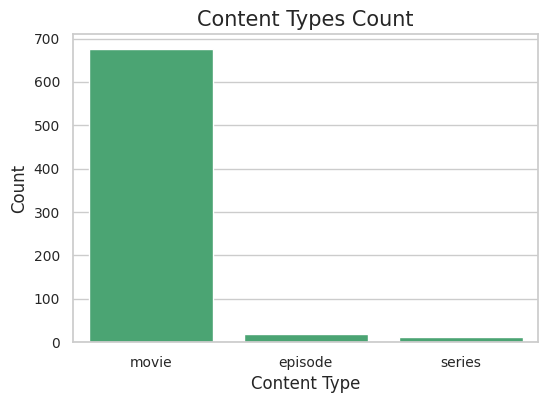

In [ ]:
# 3. Content Types count
plt.figure(figsize=(6,4))
sns.countplot(x='type',data=disney_hotstar,color="mediumseagreen")
plt.title('Content Types Count',fontsize=15)
plt.xlabel('Content Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



1.   **Dominance of movies**:The chart shows a significantly high count for movies with over 600 entries.This indicate that Disney+ has strong emphasis on movie content which aligns with its reputation for classic and family friendly films
2.   **Limited episodic content**:The count for episodes and series are very low compared to movies.This suggest that Disney+ has relatively fewer tv shows or series focusing more on standalone movies rather than episodic content


3.   **Strategic content offering**:The platform's focus on movies might appeal to viewers who prefer standalone stories rather than ongoing series.However presence of some episodic content suggests an effort to provide variety like for audience intersted in shows

This insight highlight Disney+ primary focus on movies making it suitable platform for users seeking a large selection of film content





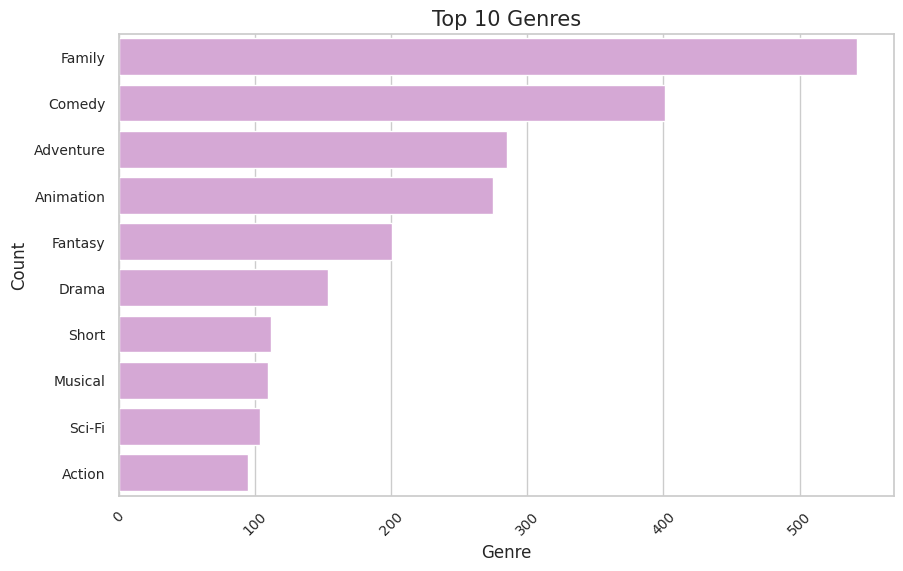

In [ ]:
# 4. Top 10 genres
genres=disney_hotstar['genre'].dropna().str.split(', ').explode()
top_genres=genres.value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres,y=top_genres.index,color=colors['genre'])
plt.title('Top 10 Genres',fontsize=15)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()



1.   **Family focused content**:The genre with highest count is 'Family' highlighting Disney+ focus on content suitable for all ages especially family friendly audiences .
2.   **Popularity of comedy and adventure**:Comedy and Adventure genres are also prominent with high count indicating that Disney+ prioritizes entertaining and adventurous content which appeal to both younger and older audiences


3.   **Emphasis on Animation and Fantasy**:The Animation and Fantasy genres are well represented suggesting that Disney + maintain its classic animated and fantasy content which has been historically popular in in Disney's portfolio
4.   **Diverse offerings across genres**:Although 'Drama' 'short','Musical','Sci-Fi', and 'Action' genres have fewer count compared to the top categories their presence reflect Disney+ efforts to offer a wide range of content catering to various viewer preference

These insight emphasize Disney+ commitment to providing a mix of family-friendly entertaining and imaginative content with a solid balance between animated and live action genres





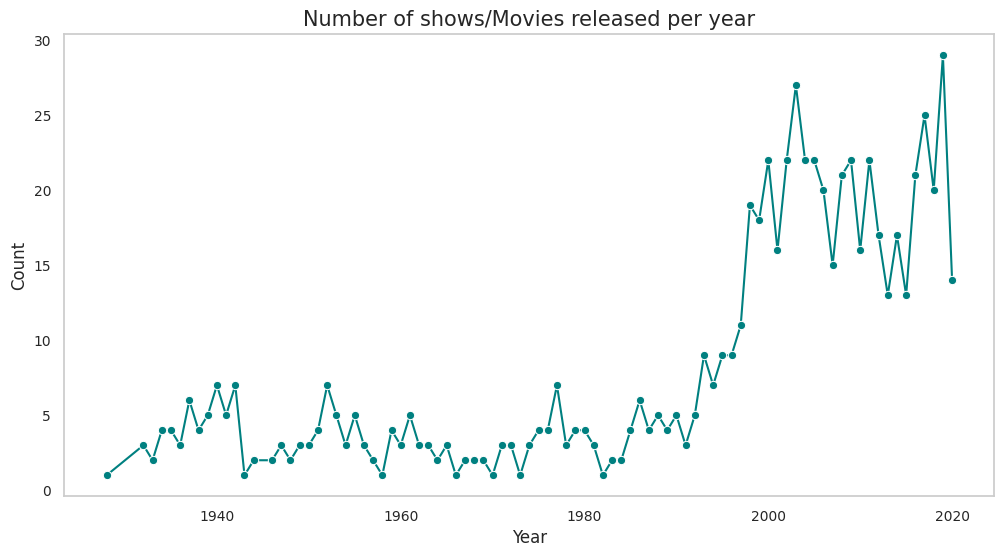

In [ ]:
# 5. Yearly content release trend
yearly_trend=disney_hotstar['year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_trend.index,y=yearly_trend.values,marker='o',color=colors['year'])
plt.title('Number of shows/Movies released per year',fontsize=15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()



1.   **Steady Releases in Early Years(1930-1980)**:Between 1930 and the late 1980's Disney maintained a relatively low and steady rate of content production with only a few releases per year.This period likely represent a time when Disney focused on a small number of high quality iconic releases establishing its brand and building its core library.
2.   **Gradual increase in  the 1990**:starting around 1990 there is a gradual increase in the number of releases.This trend aligns with Disney's expansion  efforts,including merger and acquisition as well as popularity of home entertainment  which allowed Disney to reach wider audiences


3.   **Rapid growth around 2000**:There is a notable spike in content releases starting around the early 2000.This rapid growth may correspond to the digital era with Disney expanding its content production to cater to various media platform  from theaters to home entertainment and eventually streaming





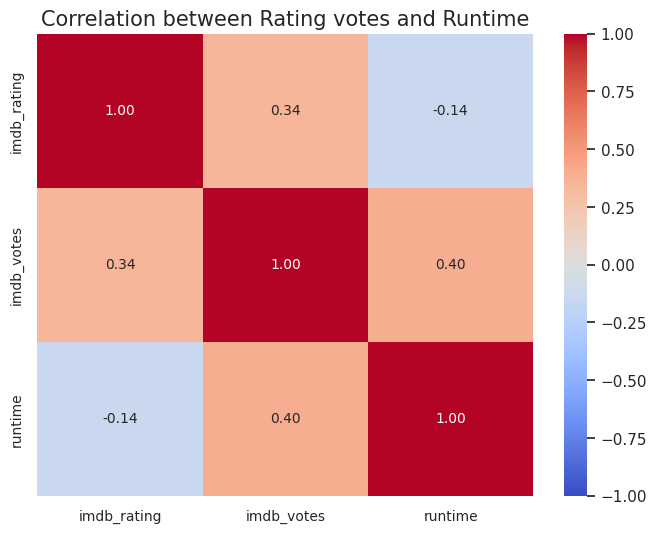

In [ ]:
# 6. Correlation Analysis
correlation_data=disney_hotstar[['imdb_rating','imdb_votes','runtime']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_data,annot=True,cmap=colors['correlation'],fmt=".2f",vmin=-1,vmax=1,annot_kws={"size":10})
plt.title('Correlation between Rating votes and Runtime',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



1.   **IMDb Rating and IMDb votes(0.34)**:There is a moderate positive correlation(0.34) between IMDb rating and the number of IMDb votes.This suggest that the movies with higher rating tend to have more votes,though the relationships is not strong.it may indicate that popular well rated movies attract more viewers who are likely to vote.
2.   **IMDb votes and Runtime(0.40)**:a moderate positive correlation exist between IMDb votes and runtime meaning longer movies tend to receive more votes.This could be because longer movies may have larger production budgets,often result in higher viewership and vote counts


3.   **IMDb rating and Runtime(-0.14)**:There is a weak negative correlation between IMDb rating and runtime suggesting that longer movies have slightly lower rating but effect is minimal.This might imply that viewers slightly prefer shorter movies in term of rating but runtime doesnot have strong influence on rating overall.

overall it suggest that moderate relationship between votes,ratings and runtime with vote and runtime doesnot have strong influence on ratings overall.



